# Preliminaries

## What is this?

Quite obviously, this is a jupyter-lab notebook. It may run on your local machine or on Google Cloud (see __[https://console.cloud.google.com/vertex-ai/workbench](https://console.cloud.google.com/vertex-ai/workbench)__). 

The latter kind is called a **Vertex AI** notebook and you will be billed for it. When you create a Vertex AI notebook, it will run &ldquo;behind the scenes&rdquo; on a GCP VM instance, which you will be required to specify, e.g.: \
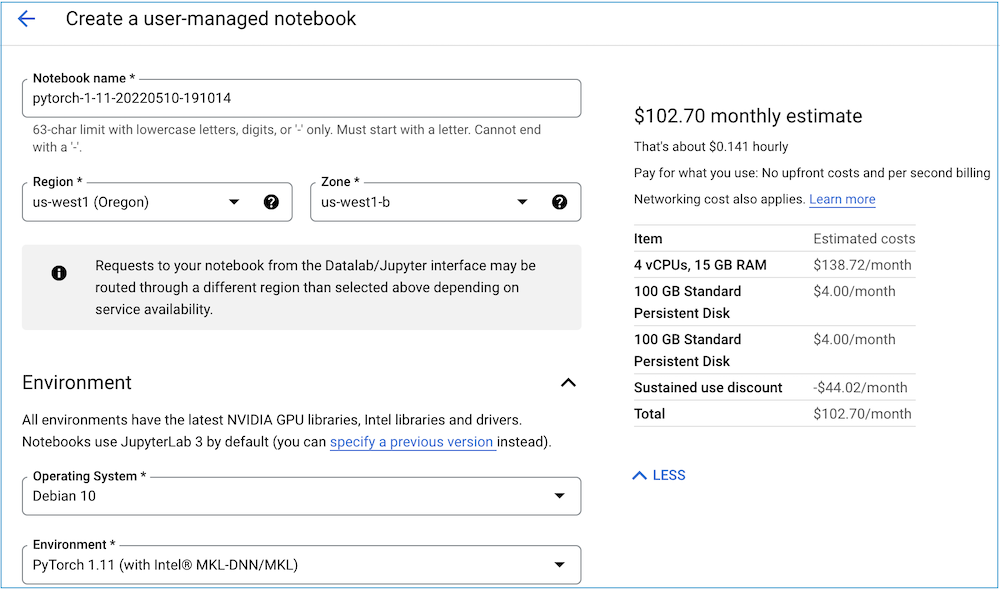

The above is a basic configuration (no GPU) and yet quite a costly one. But you may easily scale up, in power and cost:<br>
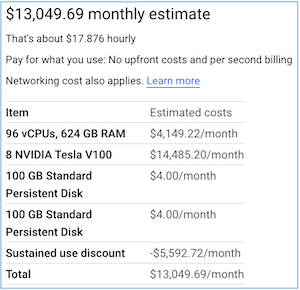

In fact, Google-hosted notebooks will be discontinued in 2025, but the notebook can still run on a GCP instance anyway.
One of the main points of this lecture is that you may run a local notebook, thus avoiding incurring such charges, and still have (a substantial) part of GCP power at your disposal by invoking BigQuery services. Of course you'll lose the benefits of upper end configurations like the latter above, but you won't probably be too worse off than with the first one. The trick is to delegate complex analytics and machine learning computations to BigQuery whenever possible, rather than have Python code in the notebook carry them out.

Most of what follows, as a result, focuses on locally running notebooks and on their interaction with GCP, particularly Bigquery.

## Jupyter and its environment (the OS)

### From the cell to the shell

In a code cell, a command starting by a "`!`" is not meant for the Python interpreter. It will be executed by the _command interpreter_ of your system. This is called the _shell_, on Unix systems; more specifically, your Unix shell will probably be called either `bash` or `zsh`:

In [1]:
!ls

'!README.md'	     2023	       _ipython      image3.png
 05_first.ipynb      Config_help       _jupyter      image3_v0.png
 05_first_v0.ipynb   Doc	       _keys	     intro_to_jupyterlab.ipynb
 05_first_v1.ipynb   Untitled.ipynb    history.txt   python_notes
 05_rest.ipynb	     Untitled1.ipynb   image1.png    tutorials


In [2]:
!ls --color -C

'!README.md'         2023              _ipython      image3.png
 05_first.ipynb      Config_help       _jupyter      image3_v0.png
 05_first_v0.ipynb   Doc               _keys         intro_to_jupyterlab.ipynb
 05_first_v1.ipynb   Untitled.ipynb    history.txt   python_notes
 05_rest.ipynb       Untitled1.ipynb   image1.png    tutorials


In [3]:
!lss

zsh:1: command not found: lss


In [4]:
!pwd

/Users/gp/Library/CloudStorage/Dropbox/SD1handouts/BigData/jupyter


Note that above you'll see the directory where your `jupyter-lab` was invoked. Its pathname will probably begin by your username (e.g. `/home/username/...` or `/Users/username/...`) if this notebook runs on your machine, or by `/home/jupyter/...` if it is a GCP managed notebook.

### Magics: `%%` and `%`

#### Cell magics

In order to run a sequence of _bash_ commands, we can use a so called &ldquo;_cell magic_&rdquo; `%%`:

In [5]:
%%bash
date
date -u
pwd
echo '--------------------------------------------------------------------'
ls --color -C

Mar Apr 29 10:53:00 CEST 2025
Mar Apr 29 08:53:00 UTC 2025
/Users/gp/Library/CloudStorage/Dropbox/SD1handouts/BigData/jupyter
--------------------------------------------------------------------
!README.md         2023             _ipython     image3.png
05_first.ipynb     Config_help      _jupyter     image3_v0.png
05_first_v0.ipynb  Doc              _keys        intro_to_jupyterlab.ipynb
05_first_v1.ipynb  Untitled.ipynb   history.txt  python_notes
05_rest.ipynb      Untitled1.ipynb  image1.png   tutorials


(On a Windows host, the `%%bash` magic is not available and the `!` does not quite work as expected).

Many cell magics (e.g. `%%bash`, `%%javascript`, `%%perl`, `%%ruby`) in a cell's first line allow remaining lines to consist of a script in a language (bash, javascript, perl, ruby etc.) that is not Python.

Another example of cell magic is `%%html`, which gives access to HTML rendering:

In [6]:
%%html
<center>This cell will render below as <b>HTML</b>.</center>

#### Line Magics

Line magics (`%`) in single line cells enable the notebook to perform actions that would be impossible or inconvenient to express in Python

Actually, line magics are in a sense Python statements, for Python code may, to some extent, be interspersed with them:

In [7]:
x = 3
%ls *.ipynb
print("x =", x)
%pwd

05_first.ipynb	   05_rest.ipynb    intro_to_jupyterlab.ipynb
05_first_v0.ipynb  Untitled.ipynb
05_first_v1.ipynb  Untitled1.ipynb
x = 3


'/Users/gp/Library/CloudStorage/Dropbox/SD1handouts/BigData/jupyter'

#### Jupyter's own online help for magics


Available magics of both kinds can be listed by... a suitable line magic command: `%lsmagic`:

In [9]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %code_wrap  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %mamba  %man  %matplotlib  %micromamba  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %uv  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%

Information about line/cell magic commands can be obtained by trailing the command with a question mark `?`. E.g.:

In [10]:
%lsmagic?

Docstring: List currently available magic functions.
File:      /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/IPython/core/magics/basic.py

In [11]:
%%bash?

Docstring:
%%bash script magic

Run cells with bash in a subprocess.

This is a shortcut for `%%script bash`
File:      /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/IPython/core/magics/script.py

### Two useful cell magics

We'll later put to good use the cell magic `%%bigquery`. 

Another useful cell magic is `%%markdown` (see also at the end). It tells the kernel that the rest of the code cell actually contains markdown code and is to be rendered as such:

In [13]:
%%markdown
This is a **code cell**, but, because of the `%%markdown` magic, will be _rendered_ as a **markdown** cell.

This is a **code cell**, but, because of the `%%markdown` magic, will be _rendered_ as a **markdown** cell.


## Installing necessary Python packages

Interacting with BigQuery from this notebook, and running the following examples, requires several Python packages to be installed. Packages can be installed in a number of Python environments:
1. at the system level (but you may be forbidden or discouraged to do so)
2. at the user level (but you may be discouraged to do so)
3. in a Python virtual environment
4. in the JupyterLab environment.

In cases (1), (2), (3), you install packages **for good** _outside the notebook_, and are then able to run notebooks like this finding all necessary packages to interact with BigQuery. 

In case (4), you install the packages _inside the notebook_, but, again, **for good**: packages will be available to any notebook each time you restart Jupyter.

Having sketched the big picture, let's now deal with the technicalities.

### The Python package manager

As you know, a Python environment always comes endowed with a (very) rich set of packages, providing a wealth of functionalities. Managing packages (i.e. their dependencies) is a complex task, requiring a _package manager_. 

**From within a notebook, you should never manage your packages with `conda` unless you know what you're doing**. Use instead `pip`, Python's standard package manager is `pip`. Very conveniently, you can use it from _within_ a Jupyter notebook, thus: 

In [1]:
%pip show jupyterlab | grep -E --color 'Name|Location'

Name: jupyterlab
Location: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages
Note: you may need to restart the kernel to use updated packages.


The `Note:` is actually issued by JupyterLab and you will always get it whenever you run `pip`, for whatever purpose, within a notebook. E.g.:

In [ ]:
%pip -V

Note that executing `%pip` is not the same as executing `!pip`. The latter has the same effect as though it ran from your system shell:

In [ ]:
!pip -V

In [ ]:
!pip show pip | grep '^Location: '

This shows us where Python system packages are installed. We'd get the same from our command line. 

Now, let's see if there is at least a user-installed package on our system: 

In [ ]:
!pip freeze --user -q | head -1 | tr -s '=' | cut -d '=' -f1

If the above output is non-empty, it will be the name of a user package; if so, we may go ahead see where the package is installed:

In [ ]:
%%bash
USER_PACKAGE=$(pip freeze --user -q | head -1 | tr -s '=' | cut -d '=' -f1)
pip show $USER_PACKAGE | egrep '^Name: |^Location: '

What should be noted, here, is that user packages are (obviously) installed in a user's directory. 

### A virtual environment for this notebook

Beware that some platforms do not allow, by default, `pip install` or even `pip install --user` to be run _from the command line_, to prevent breaking dependencies known to the platform package manager (e.g. `brew` for MacOS or `apt` for Linux/Ubuntu). Trying to install a needed package, you would get, e.g.:

In [ ]:
!pip install google-cloud 2>&1 | grep 'externally-managed'

In [ ]:
!pip install --user google-cloud 2>&1 | grep 'externally-managed'

In such cases, as a solution one could define a _virtual environment_, where packages necessary for our purposes can be installed and JupyterLab can be run.
This could be advisable anyway, to avoid messing up your working environment with our experiments. 

For this purpose (unless you have already done so) you could now:
- stop JupyterLab and this notebook
- from the shell, create and activate a virtual environment, thus:

   `python -m venv venv` \
   `source venv/bin/activate`
  
- install, by `pip`, Python packages to your hearts' content: they will actually live in the activated environment;.lèl

- restart JupyterLab and this notebook, coming back to this cell.

Later on you may deactivate the environment `venv` by invoking:
```
deactivate
```
and, should you not need the environment anymore, just delete it by: `rm -rf venv`. All installed packages will be gone!

### JupyterLab is a Python environment

A quicker solution to the problem of installing packages is provided by JupyterLab itself. It brings along its own, distinct Python environment, which disappears when you use Python from any other environment.

You can interact with JupyterLab's environment, from _within_ it, with `%pip`:

In [ ]:
%pip show jupyterlab | grep '^Location: '

Now, if you install a package inside JupyterLab, this will not interfere with system packages. E.g.:

In [ ]:
%pip install ipywidgets

In [ ]:
%pip show ipywidgets | grep '^Name: '

But no package has been installed at the system level:

In [ ]:
!pip show ipywidgets

### Installing/upgrading packages

Whichever option you chose, for your Python environment, you should now install some packages needed for our experiments. We begin with some general-purpose ones, and check which are indeed installed, for the running notebook, thus:

In [23]:
%pip freeze | grep -E --color \
    '(db-dtypes|ipywidgets|matplotlib|pandas|pyarrow|pytz|seaborn|tqdm)=='

db-dtypes==1.2.0
ipywidgets==8.1.3
matplotlib==3.9.0
pandas==2.2.2
pyarrow==16.1.0
pytz==2024.1
seaborn==0.13.2
tqdm==4.66.4
Note: you may need to restart the kernel to use updated packages.


After the above check, you'll probably install any missing packages only the first time you run this notebook. However, you will need to upgrade your packages every now and then (by `pip install --upgrade`, as shown in the code cells below).


First, we deal with the said required &ldquo;general&rdquo; Python packages. As a first attempt, we'll do just one:

In [14]:
%pip show ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install --upgrade ipywidgets

  Using cached ipywidgets-8.1.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.11-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.11-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.3-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.11-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.11-py3-none-any.whl (2.3 MB)
Note: you may need to restart the kernel to use updated packages.


Install/upgrade the other needed general packages:

In [24]:
%pip install --upgrade tqdm
%pip install --upgrade matplotlib
%pip install --upgrade seaborn
%pip install --upgrade pytz
%pip install --upgrade pandas
%pip install --upgrade db-dtypes
%pip install --upgrade ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Now, check again for the needed packages (they should be there):

In [32]:
%pip freeze | grep -E --color \
 '(db-dtypes|ipywidgets|matplotlib|pandas|pyarrow|pytz|seaborn|tqdm)=='

db-dtypes==1.2.0
ipywidgets==8.1.3
matplotlib==3.9.0
pandas==2.2.2
pyarrow==16.1.0
pytz==2024.1
seaborn==0.13.2
tqdm==4.66.4
Note: you may need to restart the kernel to use updated packages.


In the following, we'll use some shorthand aliases for some of these packages (this cell could be moved much ahead):

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Now, install some Google Cloud oriented Python packages:

In [15]:
%pip install --upgrade google-cloud
%pip install --upgrade google-cloud-monitoring
%pip install --upgrade google-cloud-storage
%pip install --upgrade google-cloud-bigquery
%pip install --upgrade google-cloud-bigquery-storage

  Using cached google_cloud-0.34.0-py2.py3-none-any.whl.metadata (2.7 kB)
Using cached google_cloud-0.34.0-py2.py3-none-any.whl (1.8 kB)

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 886.7 kB/s eta 0:00:00 kB/s eta 0:00:0103

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release 

>Notice that the _extra_ requirement `pandas`  could be added to package `google-cloud-bigquery`:
```bash
    %pip install 'google-cloud-bigquery[pandas]'
```

Finally, package `pandas-gbq` provides an interface to the Google BigQuery API from `pandas`. We'll not use it here, but it may come in handy for you, so let's install it:

In [16]:
%pip install --upgrade pandas-gbq

  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl (24 kB)
Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Interacting with GCP

## Credentials for your GCP project

We'll start interacting with Google Cloud now. We assume data we want to use are stored in a BigQuery dataset/datatable in a GCP project, as explained earlier. There are two cases to consider:
1. If this is a GCP (*Vertex AI*) managed notebook, it will have automatically access to GCP, including BQ data.

2. If this notebook is running on a local client machine, it needs proper GCP credentials, called _service account keys_.
See __[https://cloud.google.com/docs/authentication/provide-credentials-adc#local-key]( https://cloud.google.com/docs/authentication/provide-credentials-adc#local-key)__ for how to download such keys to a file,
called, e.g., `flight-data-project-310816-f5d9c75c5537.json`.

>You should notice, however, that Google now recommends avoiding to download service account keys and doing instead authentication as discussed at: https://cloud.google.com/blog/products/identity-security/how-to-authenticate-service-accounts-to-help-keep-applications-secure. See also https://cloud.google.com/iam/docs/best-practices-for-managing-service-account-keys

Next thing to do is to assign this file's name to the environment variable `GOOGLE_APPLICATION_CREDENTIALS`. 
As explained by documentation, at the URL __[https://cloud.google.com/docs/authentication/provide-credentials-adc#local-key]( https://cloud.google.com/docs/authentication/provide-credentials-adc#local-key)__, the said environment variable 
should be defined, _before launching JupyterLab_, at the shell's command prompt by, e.g., (assuming directory `_keys` contains the credentials _.json_ file.
):
```bash
export GOOGLE_APPLICATION_CREDENTIALS=_keys/flights-ccbd-7d55faa4da55.json
```

On Windows, you should define this environment variable from Windows' _Settings_.

Now, check that the required variable was actually defined, in the environment where this notebook's server runs:

In [17]:
!echo $GOOGLE_APPLICATION_CREDENTIALS

If you see no output for the previous cell, then the variable is undefined and this notebook won't be able to connect to a project (unless more complex GCP security configuration methods are employed).

**If you are on Unix**, there is, however, another option, i.e., to define variable `GOOGLE_APPLICATION_CREDENTIALS` from _within_ the notebook, affecting its outside environment immediately. For this, you can exploit Python, and its `os` library (see https://docs.python.org/3/library/os.html#os.environ,https://docs.python.org/3/library/os.html#os.putenv):

In [18]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '_keys/flights-ccbd-7d55faa4da55.json'

Now, we can try again to check whether environment variable `GOOGLE_APPLICATION_CREDENTIALS` is defined:

In [19]:
!echo $GOOGLE_APPLICATION_CREDENTIALS

_keys/flights-ccbd-7d55faa4da55.json


you should now see the variable's (string) value to be the pathname identifying a _.json_ file which should contain the key for your project.

It is important to note that the above key file is per-project (and is thus named), and specifies the GCP project this notebook will interact with. To confirm this, look for the `"project_id"` in the keys file:

In [23]:
!grep project_id $GOOGLE_APPLICATION_CREDENTIALS

  "project_id": "flights-ccbd",


This is because the key file was generated for a service account, which, in turn, was created for a specific project.
For the following experiments to work out, this must be the same project, e.g. `dsm-flights-project`, where you created a `flights` dataset with the `tzcorr` data table in it.

## Importing a flight delay data table to BigQuery

For this running example, we need the US flight data presented in our __[textbook](https://www.oreilly.com/library/view/data-science-on/9781491974551/)__. There are various ways to generate a file with the data and to make it available in BigQuery, see Chapter 5 in the __[textbook](https://www.oreilly.com/library/view/data-science-on/9781491974551/)__ or the book's companion __[GitHub repository](https://github.com/GoogleCloudPlatform/data-science-on-gcp/tree/main/05_bqnotebook)__.

However, it will be much more straightforward for you to use the Google Cloud Storage (GCS) public files `gs://flight-data-dsm-bucket/tzcorr-*.csv` that I have prepared (`flight-data-dsm-bucket` is a GCS bucket of mine).

Suppose you create a `flight-ccbd` project for practice, create a `flights` dataset in it, and in this a data table `tzcorr`, specifying the files to be imported from the GCS bucket as `flight-data-dsm/tzcorr-*.csv`, as shown below:

First create the dataset, then the data table within it \
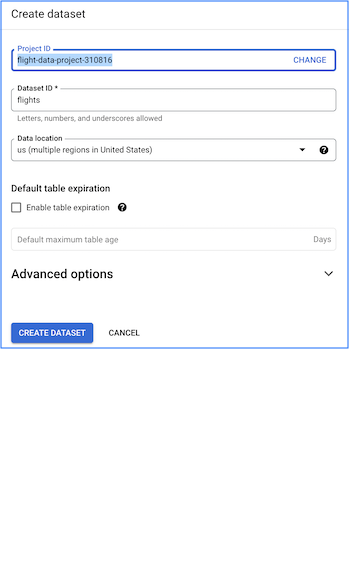
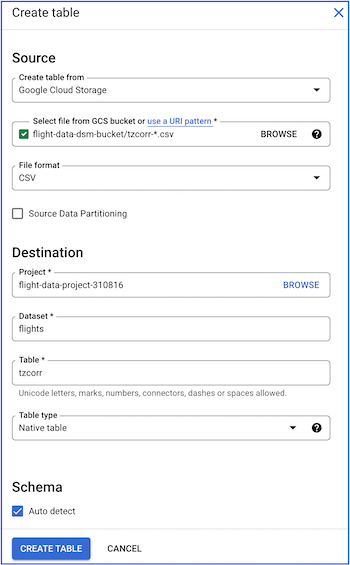

An even easier option is to copy the BigQuery data table `tzcorr` straight from a public bigquery dataset `flights` within my public `flight-data-project-310816` bucket. This can be done with the command line utility `bq`. Here is how to copy the said `tzcorr` data table to dataset `flights` **which must already exist** inside your `flights-ccbd` project:

```bash
bq cp -f flight-data-project-310816:flights.tzcorr flights-ccbd:flights.tzcorr
```

You can run the above command on your PC, assuming you have `bq` (with `gcloud` CLI) installed and your credentials set as explained before (this is guaranteed for a GCP managed notebook). 

Alternatively, it is certainly easier to run the above `bq cp` command from the GCP Cloud Shell. 

Output from it should be like (recall dataset `flights` must exist):
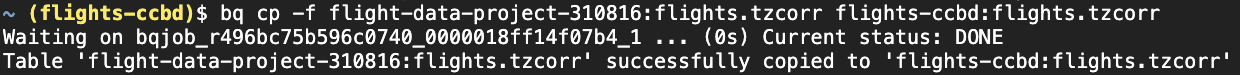

In any case, henceforth, it will be assumed that within the project associated with the credentials you'll be using (see below), there is a dataset `flights` with a data table `tzcorr`.

# Interacting with Big Query

## The BigQuery client handle

We'll now create a BigQuery client, a Python object to be used as a &ldquo;handle&rdquo; to invoke BigQuery API functions:

In [21]:
from google.cloud import bigquery
client = bigquery.Client()

As the query below confirms, the client's BigQuery scope is the default project (recall it holds a `flights` dataset with the `tzcorr` data table in it).

In [22]:
query1 = "SELECT * FROM `flights.tzcorr` LIMIT 5"

We'll know run `query1` (In case you are wondering how it will know dataset `flights` is within project `flights-ccbd` (not mentioned here), this information lies in the key file, named by variable `$GOOGLE_APPLICATION_CREDENTIALS`).

In [15]:
client.query(query1).to_dataframe()  # client.query() returns a QueryJob object, whose to_dataframe() 
                                     # method returns the job's result as a panda DataFrame

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,...,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,DEP_AIRPORT_LAT,DEP_AIRPORT_LON,DEP_AIRPORT_TZOFFSET,ARR_AIRPORT_LAT,ARR_AIRPORT_LON,ARR_AIRPORT_TZOFFSET
0,2015-05-15,AS,19930,AS,45,10299,1029904,30299,ANC,10551,...,0.00,None,0.00,399.0,61.174167,-149.998056,-28800.0,60.778611,-161.837222,-28800.0
1,2015-05-15,AS,19930,AS,51,10754,1075403,30107,BRW,14709,...,0.00,None,0.00,204.0,71.284722,-156.768611,-28800.0,70.195556,-148.465833,-28800.0
2,2015-05-15,AS,19930,AS,66,15991,1599102,35991,YAK,12523,...,0.00,None,0.00,199.0,59.503333,-139.660278,-28800.0,58.354722,-134.574722,-28800.0
3,2015-05-16,B6,20409,B6,1236,14843,1484304,34819,SJU,15024,...,1.00,A,0.00,68.0,18.439444,-66.002222,0.0,18.337222,-64.973333,0.0
4,2015-05-25,WN,19393,WN,627,10713,1071302,30713,BOI,11884,...,0.00,None,0.00,287.0,43.564444,-116.222778,-21600.0,47.619167,-117.535278,-25200.0


The origin data has many columns, like the output, and more than six million rows, but we limited the output to 5.

## The BigQuery magic

Another option to interact with BigQuery is through the BigQuery _cell magic_, `%%bigquery`, rather than via calls to the BigQuery client.

This &ldquo;magic&rdquo; works out-of-the-box with GCP-managed Vertex AI Jupyter notebooks. For you local notebook, you can activate it with the following command (if the extension is already loaded, it will say so):

In [5]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


As you already know, a line starting by a single `%` is called a _line magic_.

### Magics, iPython and its configuration files

Such &ldquo;magics&rdquo; are actually iPython features. All available magics are easily seen by typing `%<TAB>` at the iPython console.

It is indeed handy to have BigQuery and other iPython extensions autoloaded when the Jupyter server starts up (and fires off iPython). For this, insert the following clause in the configuration file `~/.ipython/profile_default/ipython_kernel_config.py`:
```Python
c.IPKernelApp.extensions = [
    'google.cloud.bigquery',  # this is for bigquery magic
#   ...                       # more extensions, if available 
]
```

If you do not find the iPython configuration files, first determine the iPython configuration directory:

In [ ]:
!ipython locate

and look for the files into it; you probably have only a default iPython profile, i.e.:

In [ ]:
!ipython profile locate

and its directory should contain two files

In [ ]:
!ls $(ipython profile locate)/ipython_*config.py 

If you do not see any output from the above `ls` command, you need to: stop _jupyterlab_, run from the shell:
```
ipython profile create
```
now edit the configuration files as desired, then restart _jupyterlab_. 
You can now run a BigQuery statement directly, through a cell magic, and can even monitor its progress:

## Two short queries

In [1]:
%%bigquery
SELECT * FROM `flights.tzcorr` LIMIT 4

Query is running:   0%|          |

Downloading:   0%|          |

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,...,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,DEP_AIRPORT_LAT,DEP_AIRPORT_LON,DEP_AIRPORT_TZOFFSET,ARR_AIRPORT_LAT,ARR_AIRPORT_LON,ARR_AIRPORT_TZOFFSET
0,2015-05-15,AS,19930,AS,45,10299,1029904,30299,ANC,10551,...,0.00,None,0.00,399.0,61.174167,-149.998056,-28800.0,60.778611,-161.837222,-28800.0
1,2015-05-15,AS,19930,AS,51,10754,1075403,30107,BRW,14709,...,0.00,None,0.00,204.0,71.284722,-156.768611,-28800.0,70.195556,-148.465833,-28800.0
2,2015-05-15,AS,19930,AS,66,15991,1599102,35991,YAK,12523,...,0.00,None,0.00,199.0,59.503333,-139.660278,-28800.0,58.354722,-134.574722,-28800.0
3,2015-05-16,B6,20409,B6,1236,14843,1484304,34819,SJU,15024,...,1.00,A,0.00,68.0,18.439444,-66.002222,0.0,18.337222,-64.973333,0.0


The `%%bigquery` magic can also specify a Python variable that will be assigned the query result as a data frame:

In [16]:
%%bigquery result
SELECT * FROM `flights.tzcorr` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

In [7]:
result

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,...,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,DEP_AIRPORT_LAT,DEP_AIRPORT_LON,DEP_AIRPORT_TZOFFSET,ARR_AIRPORT_LAT,ARR_AIRPORT_LON,ARR_AIRPORT_TZOFFSET
0,2015-05-15,AS,19930,AS,45,10299,1029904,30299,ANC,10551,...,0.00,None,0.00,399.0,61.174167,-149.998056,-28800.0,60.778611,-161.837222,-28800.0
1,2015-05-15,AS,19930,AS,51,10754,1075403,30107,BRW,14709,...,0.00,None,0.00,204.0,71.284722,-156.768611,-28800.0,70.195556,-148.465833,-28800.0
2,2015-05-15,AS,19930,AS,66,15991,1599102,35991,YAK,12523,...,0.00,None,0.00,199.0,59.503333,-139.660278,-28800.0,58.354722,-134.574722,-28800.0
3,2015-05-16,B6,20409,B6,1236,14843,1484304,34819,SJU,15024,...,1.00,A,0.00,68.0,18.439444,-66.002222,0.0,18.337222,-64.973333,0.0
4,2015-05-25,WN,19393,WN,627,10713,1071302,30713,BOI,11884,...,0.00,None,0.00,287.0,43.564444,-116.222778,-21600.0,47.619167,-117.535278,-25200.0


## A long query

The next query to the `tzcorr` data table will take minutes for the (huge) result to download (don't run this query, if you are in a hurry)! It's not so much the query in itself to take time, but rather the download (typically the download rate would be in the range of thousands to tens of thousands of rows per second).

In [2]:
%%bigquery
SELECT * FROM `flights.tzcorr`

Query is running:   0%|          |

Downloading:   0%|          |

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,...,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,DEP_AIRPORT_LAT,DEP_AIRPORT_LON,DEP_AIRPORT_TZOFFSET,ARR_AIRPORT_LAT,ARR_AIRPORT_LON,ARR_AIRPORT_TZOFFSET
0,2015-12-18,OO,20304,OO,5415,13342,1334205,33342,MKE,13930,...,0.00,None,0.00,67.0,42.946944,-87.896944,-21600.0,41.977222,-87.908056,-21600.0
1,2015-11-07,OO,20304,OO,5298,13342,1334205,33342,MKE,13930,...,0.00,None,0.00,67.0,42.946944,-87.896944,-21600.0,41.977222,-87.908056,-21600.0
2,2015-07-03,WN,19393,WN,225,13342,1334205,33342,MKE,11278,...,0.00,None,0.00,634.0,42.946944,-87.896944,-18000.0,38.851944,-77.037778,-14400.0
3,2015-03-26,WN,19393,WN,1088,13342,1334205,33342,MKE,14107,...,0.00,None,0.00,1460.0,42.946944,-87.896944,-18000.0,33.434167,-112.011667,-25200.0
4,2015-07-03,WN,19393,WN,1268,13342,1334205,33342,MKE,14107,...,0.00,None,0.00,1460.0,42.946944,-87.896944,-18000.0,33.434167,-112.011667,-25200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6264901,2015-11-18,WN,19393,WN,1684,13342,1334205,33342,MKE,10397,...,0.00,None,0.00,669.0,42.946944,-87.896944,-21600.0,33.636667,-84.427778,-18000.0
6264902,2015-03-28,DL,19790,DL,2475,13342,1334205,33342,MKE,10397,...,0.00,None,0.00,669.0,42.946944,-87.896944,-18000.0,33.636667,-84.427778,-14400.0
6264903,2015-09-27,WN,19393,WN,2133,13342,1334205,33342,MKE,10397,...,0.00,None,0.00,669.0,42.946944,-87.896944,-18000.0,33.636667,-84.427778,-14400.0
6264904,2015-05-17,WN,19393,WN,769,13232,1323202,30977,MDW,10397,...,0.00,None,0.00,591.0,41.785833,-87.752500,-18000.0,33.636667,-84.427778,-14400.0


This was just a test, to show what happens when selecting way too many rows. We'll now carry out some exploratory data analysis on more compact data, nevertheless obtained from the big data table held in BigQuery.

# Analyzing the departure delay/arrival delay relationship

## Querying for departure delay/average arrival delay

Let's operate with more reasonable requests to BigQuery, now. There are not so many distinct departure delays, so we may obtain a significant, but considerably smaller, view by relating each distinct departure delay to the _average_ corresponding arrival delay:

In [ ]:
# Triple quote """...""" allows the enclosed string ... to span multiple lines
depdelayquery = """
SELECT
  DEP_DELAY,
  AVG(ARR_DELAY) AS arrival_delay,
  COUNT(ARR_DELAY) AS numflights
FROM
  `flights.tzcorr`
GROUP BY
  DEP_DELAY
ORDER BY
  DEP_DELAY
"""

In [ ]:
depdelay = client.query(depdelayquery).to_dataframe()

In [ ]:
depdelay[1:]

To be noted:
- The first and the last few rows have only a few flights each.
- However, departure delay values of a few minutes have tens of thousands of flights

In [ ]:
depdelay[50:62]

## Digression: cancelled flights, diverted flights and null values

Some rows in the `flights.tzcorr` table show, in this notebook, a `NaN` (not a number) value for attribute `ARR_DELAY`. The reason is that, in the original table, the flight has `CANCELLED=1.00` or `DIVERTED=1.0` and, as a result, has a `NULL` `ARR_DELAY` attribute. First, let's check that every flight has either `CANCELLED=0.00` or `CANCELLED=1.00`:

In [ ]:
%%bigquery
SELECT COUNT(*) AS n_canc_no_10 FROM `flights.tzcorr` 
WHERE CANCELLED <> "1.00" AND CANCELLED <> "0.00"

Ditto for `DIVERTED`:

In [ ]:
%%bigquery
SELECT COUNT(*) AS n_canc_no_10 FROM `flights.tzcorr` 
WHERE DIVERTED <> "1.00" AND DIVERTED <> "0.00"

Diverted flights are not cancelled:

In [ ]:
%%bigquery
SELECT COUNT(*) AS n_divert_1_canc_1 FROM `flights.tzcorr` 
WHERE DIVERTED = "1.00" AND CANCELLED <> "0.00"

An extra check:

In [ ]:
%%bigquery
SELECT 
    n_cancel_1, n_cancel_0, 
    n_divert_1, n_divert_0,  
    n_cancel_0 + n_cancel_1 AS n_canc_10, n_divert_0 + n_divert_1 AS n_divert_10, n_flights
FROM (
SELECT 
    SUM(CASE WHEN CANCELLED = "1.00" THEN 1 ELSE 0 END) AS n_cancel_1,
    SUM(CASE WHEN CANCELLED = "0.00" THEN 1 ELSE 0 END) AS n_cancel_0,
    SUM(CASE WHEN DIVERTED = "1.00" THEN 1 ELSE 0 END) AS n_divert_1,
    SUM(CASE WHEN DIVERTED = "0.00" THEN 1 ELSE 0 END) AS n_divert_0,
    COUNT(*) AS n_flights
FROM `flights.tzcorr` 
)

Now, we'll verify that all and only cancelled and diverted row flights have `NULL` `ARR_DELAY`:

In [ ]:
%%bigquery
SELECT COUNT(*) AS null_canc_0_divert_0 FROM `flights.tzcorr` 
WHERE ( CANCELLED <> "1.00" AND DIVERTED <> "1.00" ) AND ARR_DELAY IS NULL

The main reason we deal with `NULL` arrival delays here is we want to make sure that sums or averages including them are not affected. We'll check this with an example, limmiting our analysis to flights delayed by 16 minutes:

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE flights.arr_delay_16 AS
SELECT 
    ARR_DELAY
FROM `flights.tzcorr` 
WHERE DEP_DELAY = 16

Let's see if there are null arrival_delays in the table of arrival delays for flights delayed by 16 minutes:

In [ ]:
%%bigquery
SELECT COUNT(*) AS n_null_16
    FROM flights.arr_delay_16 
WHERE ARR_DELAY IS NULL

Now, lets's compute the average arrival delay (for a 16 minute departure delay) in three ways: `avg_calc_16` (counting null values as well) by hand, `avg_calc_nonnull_16` (not counting null values) still by hand, and `avg_16` by SQL function `AVG()`:

In [ ]:
%%bigquery
SELECT 
    n_16, n_nonnull_16, sum_16, sum_nonnull_16, sum_16/n_16 AS avg_calc_16,
    sum_nonnull_16/n_nonnull_16 AS avg_calc_nonnull_16,
    avg_16 FROM (
SELECT
    COUNT(*) AS n_16, 
    SUM(CASE WHEN ARR_DELAY IS NOT NULL THEN 1 ELSE 0 END) AS n_nonnull_16,
    SUM(ARR_DELAY) AS sum_16,
    SUM(CASE WHEN ARR_DELAY IS NOT NULL THEN ARR_DELAY ELSE 0 END) AS sum_nonnull_16,
    AVG(ARR_DELAY) AS avg_16
FROM `flights.arr_delay_16`
)

So we may conclude, and should remember, that `NULL` values are counted as 0 in adding with `SUM()`, but are not considered anyway (i.e., are not counted) in computing the average by `AVG()`. 

Notice that a large number of `NULL` values (not the case in our running example) would offset the correct average by a lot!

## Filtering outliers in the departure delay/arrival delay relationship

To make the analysis simpler and its outcome more significant, we should remove *outliers* from the view in table `depdelay`. 

### Basic approaches and their weaknesses

To begin with, let's store the departure delay/(mean)arrival delay query into a view `dd_adm` for further reference.

In [ ]:
%%bigquery
CREATE OR REPLACE VIEW flights.dd_adm AS SELECT
  DEP_DELAY,
  AVG(ARR_DELAY) AS arrival_delay,
  COUNT(ARR_DELAY) AS numflights
FROM
  `flights.tzcorr`
GROUP BY
  DEP_DELAY
ORDER BY
  DEP_DELAY

In [ ]:
%%bigquery dd_adm
SELECT * FROM `flights.dd_adm`

In [ ]:
dd_adm[1:]

NB: da' un'occhiata a: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html e https://stackoverflow.com/questions/51174691/how-to-increase-image-size-of-pandas-dataframe-plot

In [ ]:
dd_adm.plot(kind='line', x='DEP_DELAY', y='numflights', grid='true', figsize=(14,7));

In [ ]:
dd_adm.plot(kind='line', x='DEP_DELAY', y='numflights', grid='true', figsize=(14,7), xlim=(-100,100));

The distribution of the number of flight against departure delays is not too different from a normal one. Quite clearly, many departure delays, i.e. rows in the `dd_adm` view are outliers, for they hold too few flights, and this happens for delays that are too big (in absolute value). 

There are two basic ways to catch meaningful rows in such a view: 
1. limit the range of the departure delay variable, e.g. drop rows `WHERE dep_delay > -20 AND dep_delay < 150`
2. ignore departure delays occurring too few times, e.g. drop rows `WHERE numflights > 300`

Both approaches have their weaknesses. 

(1) requires good choices for the lower and upper bounds, such that not too many values are discarded, e.g., less than 2%. Even then, it remains prone to miss significant singularities which, with *big data*, can indeed happen. E.g., say the above filter `(-20,150)` discards 2% of 6,000,000 flights, i.e. 120,000 flights; now, suppose 30,000 flights are delayed by (about) 200 minutes (**actually, this is not the case in our running example!**): the analysis would miss such a phenomenon, which would instead be worth noticing and investigating indeed!

In [ ]:
%%bigquery
SELECT * FROM flights.dd_adm
WHERE DEP_DELAY > -20 AND dep_delay < 150

(2) avoids such a pitfall &ldquo;by design&rdquo;, but fails to model _long-tail_ scenarios, where many distinct values occur a relatively few times each (think e.g. of a &ldquo;flat&rdquo; normal distribution). Again, we face the difficulty of choosing a reasonable bound: e.g., why `300` in `WHERE numflights>300`?

In [ ]:
%%bigquery dd_adm_300
SELECT * FROM flights.dd_adm
WHERE numflights > 300

In [ ]:
dd_adm_300[225:]

### Digression: computing with the `HAVING` clause

Vedi anche (se serve): https://www.google.com/search?client=safari&rls=en&q=sql+having+vs+where&ie=UTF-8&oe=UTF-8 and https://towardsdatascience.com/3-ultimate-ways-to-find-unique-records-in-sql-6ddf8ae567b0, https://learn.microsoft.com/en-us/sql/ssms/visual-db-tools/use-having-and-where-clauses-in-the-same-query-visual-database-tools?view=sql-server-ver16, https://www.javatpoint.com/where-vs-having, ...


Mi pare eccellente https://stackoverflow.com/a/41174185 e guardati anche https://stackoverflow.com/questions/2421388/using-group-by-on-multiple-columns (che contiene la risposta precdente alla domanda, pure interessante, su come si fa GROUP BY su attributi multipli).

Comunque, in soldoni:
- `WHERE` filtra righe dall'output di `SELECT... FROM... `
- 'HAVING' presuppone `GROUP BY` e filtra dentro i gruppi
- `SELECT attr,... FROM table GROUP BY attr` è come se:
  * producesse una tabella in cui le righe di `table` con stesso `attr` vengono messe contigue (solo un aiuto per l'immaginazione) e poi ogni gruppo con `attr=a0` diventasse un'unica riga con `attr=a0` e gli atri attributi che provengono dalle funzioni aggregate specificate in `...`
  * un altro modo di vedere la cosa: l'output è una tabella con attributo `attr` che avrà solo valori distinti e altri attributi calcolati coma aggregati a partire dagli attributi in `...`

Ma vedi https://stackoverflow.com/a/41174185 che spiega benissimo e probabilmente basta.

Oppure proviamo così:
Data una tabella `table` con un attributo `some_attr`, se `AGGR(.)` è una funzione aggregata, si può calcolare
```
SELECT AGGR(some_attr) FROM table
```
che sarà un unico valore. Ora, immaginiamo di voler calcolare 

In `SELECT AGGR(some_attrs) FROM table` 

`SELECT attr,... FROM table GROUP BY attr` produce una tabella con tante righe quanto sono i valori distinti di `attr` e, per attributi, `attr` stesso e gli altri...

Mi sono un po' perso qui... 

Forse la spiegazione in


Alternatively, in querying the original `flights.tzcorr` table, the `HAVING` clause can be employed to restrict the set of departure delays for which the average arrival delay is computed. (Notice that the `WHERE` clause cannot be applied to the computed field `numflights` in the base query). 

In [ ]:
%%bigquery
SELECT
  DEP_DELAY,
  AVG(ARR_DELAY) AS arrival_delay,
  COUNT(ARR_DELAY) AS numflights
FROM
  `flights.tzcorr`
GROUP BY DEP_DELAY HAVING numflights > 300
ORDER BY DEP_DELAY

The basic idea is that `WHERE` is used to filter rows **before** any `GROUP`ing takes place, whereas `HAVING` is used to filter values from a `GROUP`.

To understand this, first create a view `dd_ad` computing the table of pairs $(\delta, \alpha)$, where $\delta$ is an integer departure delay and $\alpha$ is a float arrival delay:

In [ ]:
%%bigquery
CREATE OR REPLACE VIEW flights.dd_ad AS 
SELECT
  FL_DATE,UNIQUE_CARRIER,FL_NUM,DEP_DELAY,ARR_DELAY
FROM
  `flights.tzcorr`

(Notice how we are trying to avoid running queries with very large results or storing these in tables. A view will do!).

In the result table of `dd_ad`, each row has a (non-unique) departure delay. We would like to &ldquo;group together&rdquo; rows having the same `DEP_DELAY` value:

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE flights.arr_del_1 AS
SELECT *
FROM `flights.dd_ad` 
WHERE DEP_DELAY = 1

In [ ]:
%%bigquery
SELECT * FROM flights.arr_del_1
ORDER BY ARR_DELAY

In [ ]:
%%bigquery
SELECT ARR_DELAY FROM flights.tzcorr
WHERE FL_DATE = "2015-11-29" AND UNIQUE_CARRIER = "AA" AND FL_NUM = "45" AND DEP_DELAY = 1

In [ ]:
%%bigquery
SELECT * 
FROM flights.arr_del_1
WHERE IS_NAN(ARR_DELAY)

In [ ]:
%%bigquery
SELECT AVG(ARR_DELAY) 
FROM flights.arr_del_1
WHERE ARR_DELAY IS NOT NULL

### Filtering on the range: the 3$\sigma$ rule

Supposing we decide to go for (1) anyway, how do we choose the filter range _so that we do not discard too many flights_? An answer is provided by the so called _three $\sigma$-rule_, where $\sigma$ denotes the standard deviation. 

Theory tells us that, if the distribution of departure delays is Gaussian (normal), 99.7% of all flight data will fall within $\pm 3\sigma$ of $\mu$, the average departure delay. (Since departure delays are the product of a large number of statistically independent factors, we can in fact expect them to be normally distributed). So, if we discard departure delays outside the $(\mu-3\sigma,\mu+3\sigma)$ range, we know these will only be 0.3% of the whole set.

Let us formulate a query to calculate the bounds of the neighbourhood of radius $3\sigma$ of $\mu$, the average departure delay. 

In [ ]:
sigma_mu_query = """
SELECT    
  AVG(DEP_DELAY) AS mu,
  STDDEV(DEP_DELAY) AS sigma
FROM `flights.tzcorr`
"""
df = client.query(sigma_mu_query).to_dataframe()
mu = df.at[0,'mu']
sigma = df.at[0,'sigma']

In [ ]:
df

In [ ]:
fmin = mu-3*sigma
fmax = mu+3*sigma
fmin_fmax = {'fmin': fmin, 'fmax': fmax}; params

This JSON object is used to parameterize on the filter bounds `@fmin,@fmax` the next query, which counts the flights included by the filter:

In [ ]:
%%bigquery df1 --params $fmin_fmax
SELECT
    COUNT(DEP_DELAY) AS n_filtered_delays
FROM `flights.tzcorr`
WHERE DEP_DELAY > @fmin AND DEP_DELAY < @fmax

In [ ]:
df1

Notice that we have queried the original `tzcorr` table rather than the `depdelay` query result. Now, let `n_incl` be the number of included flights:

In [ ]:
n_incl = df1.at[0,'n_filtered_delays']; n_incl

The next query calculates how many flights (rows) `n_all` are in `tzcorr`:

In [ ]:
%%bigquery df2
SELECT
  COUNT(DEP_DELAY) AS n_all_delays
FROM `flights.tzcorr`

In [ ]:
n_all = df2.at[0,'n_all_delays']; n_all

We may now compute difference and ratio of included vs. total flights:

In [ ]:
n_all-n_incl, n_incl/n_all

I.e., only 123,516 out of more than six million total flights are discarded by the filter, whereas 98% of them lie in the $3\sigma$ neighbourhood. The expected value for an ideal normal distribution would be about 99.7%.

So the filter is actually effective, but it may still miss some interesting singularities: as noted above, these might happen to be among the 123,516 discarded flight rows.

### Filtering on occurrence quantiles

Let's try another filtering approach, based on quantiles, to discard outliers. We split departure delays in 20 quantiles, with a view to discarding the bottom and the top quantiles.

In [ ]:
%%bigquery
SELECT 
    q[OFFSET(0)] AS q0,q[OFFSET(1)] AS q1, 
    q[OFFSET(19)] AS q19,q[OFFSET(20)] AS q20
FROM (
SELECT
  APPROX_QUANTILES(DEP_DELAY, 20) AS q
FROM `flights.tzcorr`
)

So we'll consider only departure delays in $[-9,66]$ thus dropping 10% of the values (the highest 5%, the lowest 5%). But, again, as with the 3$\sigma$ rule, we do not know whether we are discarding any interesting singularity &mdash; an often recurring delay in the first or last quantile. And it is not quite correct to drop such quantiles in a *long-tail* scenario, with many values occurring a comparable number of times.

In fact, the term &ldquo;_outlier_&rdquo; is somewhat of a misnomer when it comes to __big data__. Technically, outliers are values that lie outside an appropriate range. In fact, such values may well be of interest anyway when big numbers are involved.

### Filtering on the &ldquo;right&rdquo; frequency

Here, we are keeping data that meets a criterion involving frequency of occurrence (`HAVING numflights > 370`)—any value is acceptable so long as it occurs often enough in our data.

In [ ]:
depdelay_freq_filtered_query = """
#standardsql
SELECT
  DEP_DELAY, AVG(ARR_DELAY) AS arrival_delay,
  STDDEV(ARR_DELAY) AS stddev_arrival_delay,
  COUNT(ARR_DELAY) AS numflights
FROM `flights.tzcorr`
GROUP BY DEP_DELAY
HAVING numflights > 370
ORDER BY DEP_DELAY
"""
ffq = client.query(depdelay_freq_filtered_query).to_dataframe()
ffq

So, all departure delays occurring more than 370 times lie in the $[-23,223]$ interval (delays in $[-82,-23[$ and in $]223,1988]$ are discarded). 
This interval should be compared with $[-101,122]$ resulting from the 3$\sigma$ filter, and $[-9,66]$ resulting from the quantile-based filter.

But why do we consider departure delays if their frequency is greater than 370 (`HAVING numflights > 370`)? This is just a heuristic, but it's related with 3$\sigma$ rule again. Let's see why. First of all, notice that:

In [ ]:
370*0.9973

Remarks:
* Since we deal with more than six million flights, arrival (and departure) delays can be expected to be normally distributed. 

* Also the set of arrival delays, for a given departure delay, should be normally distributed, unless there are too few of them. How many are "too few"? We'll assume a meaningful population to be one having at least some samples outside $\pm3\sigma$ of the average.

With 370 samples, we know $99.73\%$, i.e. $369$, of them are expected to fall within $\pm3\sigma$ of the average, while $1=(1-0.9973)\cdot 370$ falls outside. 

Let us now count how many flights there are, how many depart, and how many arrive (some "depart" in the sense they leave the gate, but never take off, so do not arrive):

## Continue on other notebook, `05_rest.ipynb`

# Other stuff (move above, where we discuss cell magic `%%Markdown`)

In [ ]:
from IPython.display import Markdown

In [ ]:
n_flights = """
#standardSQL
SELECT COUNT(*) AS nf
FROM `flights.tzcorr`"""
client.query(n_flights).to_dataframe()

In [ ]:
greetings = "Hello"
name = "World"

# display Markdown text with greetings and name variables

Markdown(f"""

## {greetings} {name}!

You can mix Markdown with variables thanks to `IPython.display.Markdown()`.

""")

In [ ]:
n = 3

In [ ]:
Markdown(f"""
We know `n = {n}`
""")

In [ ]:
%%markdown
We know `n = {n}`